In [8]:
# Here are the packages used for the Stress equations and graphs
#=====================================================================================================
#Imports

#Import entire numpy library
from numpy import *

#Import scipy.special library
from scipy.special import *

#Import entire matplotlib
import matplotlib.pyplot as plt

#This is used for variable display in the GUI

In [9]:
#----------------------------------------------------------------------------------------------------
# For the moment all of these inputs are the same for the equations and graphs
#=====================================================================================================
#Longitudinal wave speed
v1 = 5

#Longitudinal wave attenuation
X1 = 2

#Shear wave speed
v2 = 7

#Shear wave attenuation
X2 = 8

#rho: Desity of the Medium
p = 3

# rho2: Density of the crystal
p2 = 1

#Phi_0: Amplitude of the Incident Wave
P = 6

#a: radius of the chrystal
a = 4

#omega: angular frequency
w = 9

#Thermal Conductivity
k = 1

#Thermal Diffusivity
gamma = 1

In [11]:
#-----------------------------------------------------------------------------------------------------
# Here are the parameters for the Stress equations
#=====================================================================================================
#Parameter Equations

#Cotangent function
def cot(tha):
    if tha == 0 or tha == pi:
        return 0
    else:
        return 1/tan(tha)

#N_p
def Np(n):
    return (4 * n**2) + (n+1) * (B1/a1)**2 

#A_n
def An(n):
    p1 = 1
    p2 = 1
    
    if n == 0:
        return -1/3 * 1j * P * (a1*a)**3
        
    if n == 1:
        return -1/3 * 1j * P * (1 - (p2/p1)) * (a1*a)**3
        
    if n > 1:
        return (1j)**(n-1) * P * ( (2**n * factorial(n))/factorial(2*n) )**2 * Np(n)*(a1*a)**(2*n-1)

#B_n
def Bn(n):
    if n == 0:
        return 1
    
    elif n > 0:
        return -(B1/a1)**(n+1) * (An(n)/n)

#mu_1
u1 = p * w**2 / B1

#P_n: Legendre Pollynomials
def Pn(n):
    return legendre(n)
#n: int
#Degree of the polynomial.

#d(P_n)/dtheta: derivatives of Legendre Pollynomials
def dPndtha(m,n,x,tha):
    if n == 0:
        return 0
        
    elif n >= 1:
        if m == 1:
            return -lpmv(1,n,x)
        elif m == 2:
            return -lpmv(1,n,x)*(cot(tha))
        else:
            raise TypeError("Invlaid input. The first term should be a 1 or a 2")
        
    elif n > 1:
        if m == 1:
            return -lpmv(1,n,x)
        elif m == 2:
            return lpmv(2,n,x) - lpmv(1,n,x)*(1/tan(tha))
        else:
            raise TypeError("Invlaid input. The first term should be a 1 or a 2")
        

#h_n: Spherical Hankel Function of the first kind
def hn(n,z):
    return hankel1(n,z)
#n: array_like
#Order (float)

#z: array_like
#Argument (float or complex)
#Basically whatever is in the parentheses


#j_n: Spherical Bessel Function of the first kind
def jn(n,z):
    return spherical_jn(n,z)
#n: int, array_like
#Order of the Bessel function (n >= 0)

#z: complex or float, array_like
#Argument of the Bessel function
#Basically whatever is in the parentheses

In [14]:
#-----------------------------------------------------------------------------------------------------
# Here are the parameters for the Delta and Xi equations
#=====================================================================================================
#Parameter Equations

#
E1 = v1**2 * p + v1**2 * p * 10**(X1*v1/10) * 1j

#
G1 = v2**2 * p + v2**2 * p * 10**(X2*v2/10) * 1j

#
nu1 = E1/(2*G1) + 1

#alpha_1 = Complex Longitudinal Wave Number
a1 = w * sqrt( (1 + nu1) * (1 - 2*nu1) * p / (E1*(3*nu1 - 1)) )

#Betta_1: Complex Shear Wave Number
B1 = w * sqrt( 2*p * (1 + nu1) / E1 )


In [15]:
#----------------------------------------------------------------------------------------------------
# This is the stress equation for Phi Phi
#====================================================================================================
def sigphiphi_sum(r,tha):
    sigsum = 0
    
    for n in range(0, 20):
        sigsum += ( ( Pn(n)(cos(tha)) * ( P * (1j)**n * ( 2*n + 1 ) * ( ( (n+ (a1**2) * (r**2)- B1**2 * r**2 )/2) * (jn(n,(a1*r))) - a1*r*jn(n+1,(a1*r)) ) +  An(n) * ( ((n + (a1**2) * (r**2) - (B1**2) * (r**2)/2) * hn(n,(a1*r)) - a1*r*hn(n+1,(a1*r)) ) - Bn(n) * (n + 1) * hn(n,(B1*r))+ (cot(tha))*dPndtha(1,n,cos(tha),tha) * (P * (1j)**n * ( 2*n + 1 ) * jn(n,(a1 * r)) + An(n) * hn(n,(a1 * r)) -Bn(n) *( (n+1)* hn(n,(B1*r)) - B1*r*hn(n+1,(B1*r)) ) ) ) ) ) )
    return sigsum

#Theta array
tha = linspace(0, 2*pi, 20)
#j

#R array
r = arange(a, 20*a + 1, a)
#i

#sigma_phiphi
sigphiphi = zeros( (20,20),dtype = complex )

for i in range(0, r.size):
    for j in range(0, tha.size):
        sigphiphi[i,j] = 2*u1/r[i]**2 * sigphiphi_sum(r[i],tha[j])


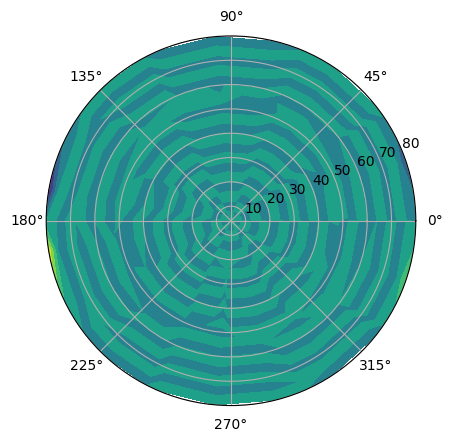

In [16]:
#----------------------------------------------------------------------------------------------------
# This is the graph for Stress Phi Phi
#=====================================================================================================
#-- Generate Data -----------------------------------------
# Using linspace so that the endpoint of 360 is included...
azimuths = tha
zeniths = r

R, theta = meshgrid(zeniths, azimuths)
values = sigphiphi.real


#-- Plot... ------------------------------------------------
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
ax.contourf(theta, R, transpose(values))

plt.show()

In [17]:
#----------------------------------------------------------------------------------------------------
# This is the stress equation for R R
#====================================================================================================
def sigrr_sum(r,tha):
    sigsum = 0
    
    for n in range(0, 20):
        sigsum += Pn(n)(cos(tha)) * ( P * (1j)**n * (2*n + 1) * ( n**2 - n - B1**2 * r**2/2 * ( jn(n,(a1*r)) ) + 2*a1*r*jn(n+1,(a1*r)) ) + An(n) * ( n**2 - n - B1**2 * r**2/2 * ( hn(n,(a1*r))) + 2*a1*r*hn(n+1,(a1*r)) ) - Bn(n) * ( n*(n+1)*(n-1)*hn(n,(B1*r)) - n*(n+1)*B1*r*hn(n+1,(B1*r)) ) )
    return sigsum

#Theta array
tha = linspace(0, 2*pi, 20)
#j

#R array
r = arange(a, 20*a + 1, a)
#i

#sigma_rr
sigrr = zeros( (20,20),dtype = complex )

for i in range(0, r.size):
    for j in range(0, tha.size):
        sigrr[i,j] = 2*u1/r[i]**2 * sigrr_sum(r[i],tha[j])


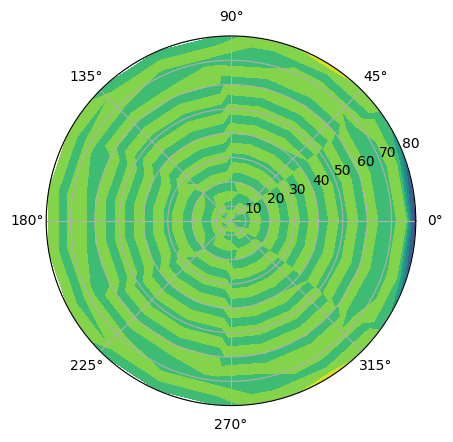

In [18]:
#----------------------------------------------------------------------------------------------------
# This is the graph for Stress R R
#=====================================================================================================
#-- Generate Data -----------------------------------------
# Using linspace so that the endpoint of 360 is included...
azimuths = tha
zeniths = r

R, theta = meshgrid(zeniths, azimuths)
values = sigrr.real


#-- Plot... ------------------------------------------------
fig, ax = subplots(subplot_kw=dict(projection='polar'))
ax.contourf(theta, R, transpose(values))

show()

In [19]:
#----------------------------------------------------------------------------------------------------
# This is the stress equation for Theta Theta
#=====================================================================================================
def sigthatha_sum(r,tha):
    sigsum = 0
    
    for n in range(0, 20):
        sigsum += ( ( Pn(n)(cos(tha)) * ( P * (1j)**n * ( 2*n + 1 ) * ( ( (n+ (a1**2) * (r**2)- B1**2 * r**2 )/2) * (jn(n,(a1*r))) - a1*r*jn(n+1,(a1*r)) ) +  An(n) * ( ((n + (a1**2) * (r**2) - (B1**2) * (r**2)/2) * hn(n,(a1*r)) - a1*r*hn(n+1,(a1*r)) ) - Bn(n) * (n + 1) * hn(n,(B1*r)) + dPndtha(2,n,cos(tha),tha) * (P * (1j)**n * ( 2*n + 1 ) * jn(n,(a1 * r)) + An(n) * hn(n,(a1 * r)) -Bn(n) *( (n+1)* hn(n,(B1*r)) - B1*r*hn(n+1,(B1*r)) ) ) ) ) ) )
    return sigsum

#Theta array
tha = linspace(0, 2*pi, 20)
#j

#R array
r = arange(a, 20*a + 1, a)
#i

#sigma_thetatheta
sigthatha = zeros( (20,20),dtype = complex )

for i in range(0, r.size):
    for j in range(0, tha.size):
        sigthatha[i,j] = 2*u1/r[i]**2 * sigthatha_sum(r[i],tha[j])


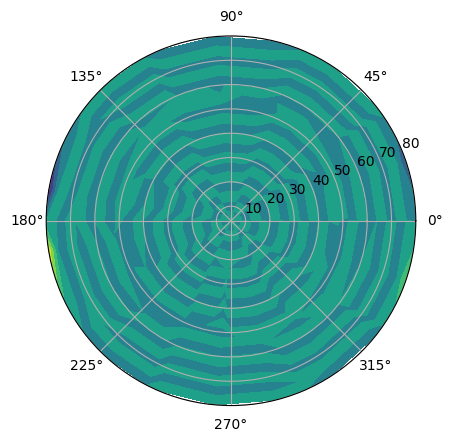

In [20]:
#----------------------------------------------------------------------------------------------------
# This is the graph for Stress Theta Theta
#=====================================================================================================
#-- Generate Data -----------------------------------------
# Using linspace so that the endpoint of 360 is included...
azimuths = tha
zeniths = r

R, theta = meshgrid(zeniths, azimuths)
values = sigthatha.real


#-- Plot... ------------------------------------------------
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
ax.contourf(theta, R, transpose(values))

plt.show()

In [21]:
#----------------------------------------------------------------------------------------------------
# This is the stress equation for R Theta
#=====================================================================================================
def sigrtha_sum(r,tha):
    sigsum = 0
    
    for n in range(0, 20):
        sigsum += ( dPndtha(1,n,cos(tha),tha) * ( P * (1j)**n * ( 2*n + 1 ) * ( ( (n-1) * (jn(n,(a1*r))) - a1 * r * jn(n+1,(a1*r)) ) + An(n) * ( ((n- 1) * hn(n,(a1*r)) - a1 * r * hn(n+1,(a1*r)) )- Bn(n) *( ( ( n**2 ) - 1 - (B1 **2) * (r**2) / 2) * hn(n,(B1*r)) +  (B1*r) * hn(n+1,(B1*r)) ) ) ) ) )
    return sigsum

#Theta array
tha = linspace(0, 2*pi, 20)
#j

#R array
r = arange(a, 20*a+a, a)
#i

#sigma_rtheta
sigrtha = zeros( (r.size,tha.size),dtype = complex )

for i in range(0, r.size):
    for j in range(0, tha.size):
        sigrtha[i,j] = 2*u1/r[i]**2 * sigrtha_sum(r[i],tha[j])

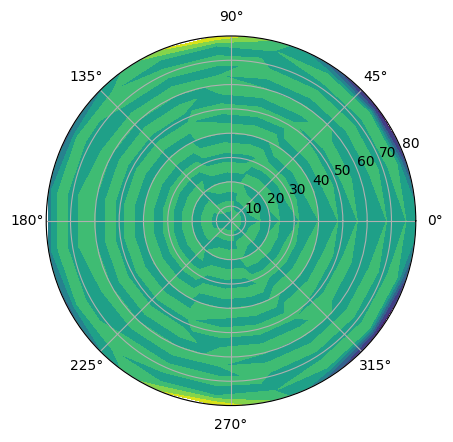

In [22]:
#----------------------------------------------------------------------------------------------------
# This is the graph for Stress R Theta
#=====================================================================================================
#-- Generate Data -----------------------------------------
# Using linspace so that the endpoint of 360 is included...
azimuths = tha
zeniths = r

R, theta = meshgrid(zeniths, azimuths)
values = sigrtha.real


#-- Plot... ------------------------------------------------
fig, ax = subplots(subplot_kw=dict(projection='polar'))
ax.contourf(theta, R, transpose(values))

show()

In [23]:
#----------------------------------------------------------------------------------------------------
# This is the equation for Delta R R
#====================================================================================================
# For the sake of my brain, I reimported numpy as np
import numpy as np

# The following equation gives the arrays for Delta R R
drr = (np.angle(E1)) + (np.angle(sigrr)) - (np.angle((sigrr) - ((nu1) * ((sigthatha) + (sigphiphi)))))

# Printing the arrays
print(drr)

[[ 1.47504965e-01  3.00681072e+00 -1.21333151e+00 -2.38904712e+00
   1.74706806e+00  2.26081096e+00  2.97627010e+00 -1.52048840e-01
   2.95377119e-01  1.00165986e+00 -1.28361732e+00 -1.46272638e+00
   2.48159446e+00  3.06110645e+00  2.30947765e+00  2.79838381e+00
  -1.01810726e+00  1.44763085e+00 -3.59848721e-02  1.47504965e-01]
 [ 2.03721911e+00 -3.04807225e+00  4.17946235e-01  3.91610883e+00
   1.01492207e+00 -3.31778809e-01 -1.84840019e+00  4.66396232e-01
   6.07035209e+00  1.54903333e-01  3.71823929e+00  3.97996107e+00
  -2.71449299e+00 -8.65726414e-01 -8.36989756e-02  3.28240580e+00
   1.30236514e-01 -3.05286179e+00  3.03654032e-01  2.03721911e+00]
 [ 1.71308824e+00  3.26726711e+00  5.77100868e-02 -2.66663278e+00
   8.47376276e-01  5.54823864e+00  4.19380248e+00  3.25691364e-01
  -1.75034304e-01  2.77565145e-01 -2.59532095e+00 -2.49790522e+00
   3.44111008e+00  5.97728798e+00  5.96062195e+00 -3.03146740e+00
   5.20421211e-01  2.95569122e+00  3.54576945e-01  1.71308824e+00]
 [ 1.61

In [24]:
#----------------------------------------------------------------------------------------------------
# This is the equation for Delta theta theta
#====================================================================================================
# For the sake of my brain, I reimported numpy as np
import numpy as np

# The following equation gives the arrays for Delta R R
dthatha = (np.angle(E1)) + (np.angle(sigthatha)) - (np.angle((sigthatha) - ((nu1) * ((sigrr) + (sigphiphi)))))

# Printing the arrays
print(dthatha)

[[ 2.88288809  6.17481376 -2.1013918  -1.20191177  0.78722535  0.34779168
   6.09356451  3.29773462 -3.57638313 -4.32238472 -2.0442349  -1.84497026
   6.63848096  5.85820748  0.2520897  -0.61722948 -1.86119412  1.49695415
   3.04490165  2.88288809]
 [-1.03319108 -0.41434857  2.55879321  5.09164419  2.25838974 -2.88981972
  -1.51172525  2.52762043  3.16978075  2.79959316  5.49903077  5.23107143
  -0.66646938 -2.27144621 -3.11452548  5.64390616  3.57251973 -0.33713915
   2.76924296 -1.03319108]
 [ 5.13268226  5.82623225  2.9200325  -1.05877994  2.47569383  3.79448606
   4.97191358  2.66788766 -3.14348866  2.67698036 -0.75474742 -0.86490069
   5.74125473  3.69257209  3.44390591 -0.66885734 -3.0898708   6.22814567
   2.71947516  5.13268226]
 [-1.19733423 -0.47101421  3.10591293  5.31268218  2.53227165 -2.25160251
  -1.22822753  2.67311032  3.11961946  2.65050428  5.57752387 -0.72495697
  -0.53128343 -2.94667678 -2.72783576  5.62085864  2.99678603  0.09004159
   2.69942523 -1.19733423]
 [ 5

In [25]:
#----------------------------------------------------------------------------------------------------
# This is the equation for Delta phi phi
#====================================================================================================
# For the sake of my brain, I reimported numpy as np
import numpy as np

# The following equation gives the arrays for Delta R R
dphiphi = (np.angle(E1)) + (np.angle(sigphiphi)) - (np.angle((sigphiphi) - ((nu1) * ((sigrr) + (sigthatha)))))

# Printing the arrays
print(dphiphi)

[[ 2.88288809  6.17481376 -2.1013918  -1.20191177  0.78722535  0.34779168
   6.09356451  3.29773462 -3.57638313 -4.32238472 -2.0442349  -1.84497026
   6.63848096  5.85820748  0.2520897  -0.61722948 -1.86119412  1.49695415
   3.04490165  2.88288809]
 [-1.03319108 -0.41434857  2.55879321  5.09164419  2.25838974 -2.88981972
  -1.51172525  2.52762043  3.16978075  2.79959316  5.49903077  5.23107143
  -0.66646938 -2.27144621 -3.11452548  5.64390616  3.57251973 -0.33713915
   2.76924296 -1.03319108]
 [ 5.13268226  5.82623225  2.9200325  -1.05877994  2.47569383  3.79448606
   4.97191358  2.66788766 -3.14348866  2.67698036 -0.75474742 -0.86490069
   5.74125473  3.69257209  3.44390591 -0.66885734 -3.0898708   6.22814567
   2.71947516  5.13268226]
 [-1.19733423 -0.47101421  3.10591293  5.31268218  2.53227165 -2.25160251
  -1.22822753  2.67311032  3.11961946  2.65050428  5.57752387 -0.72495697
  -0.53128343 -2.94667678 -2.72783576  5.62085864  2.99678603  0.09004159
   2.69942523 -1.19733423]
 [ 5

In [26]:
#----------------------------------------------------------------------------------------------------
# This is the equation for Delta R theta
#====================================================================================================
# For the sake of my brain, I reimported numpy as np
import numpy as np

# The following equation gives the arrays for Delta R R
drtha = (np.angle(E1)) - (np.angle(1 + nu1))

# Printing the arrays
print(drtha)

1.4711279946883378


In [27]:
#----------------------------------------------------------------------------------------------------
# This is the equation for Xi R R
#====================================================================================================
# The following equation gives the arrays for Xi R R
xirr = (sin(drr)) * (abs(sigrr)) * (abs((sigrr) - ((nu1) * ((sigthatha) + (sigphiphi)))))

# Printing the arrays
print(xirr)

[[ 1.01167884e+11  8.11718476e+11 -1.59912086e+12 -1.05532309e+12
   2.55555890e+12  2.67015441e+12  4.00534496e+11 -1.87683854e+11
   1.24763233e+12  9.33627560e+12 -1.27752367e+13 -1.41118643e+12
   1.35523111e+12  9.57277467e+10  2.34936047e+12  6.91099269e+11
  -3.06456789e+11  1.17612771e+12 -1.42784510e+11  1.01167884e+11]
 [ 1.90894204e+14 -1.10003145e+14  2.32536062e+13 -4.28021581e+13
   2.68329595e+13 -4.80216132e+12 -5.03580410e+13  1.98741638e+13
  -6.10248714e+12  4.17662823e+13 -1.77804877e+14 -1.26663966e+13
  -2.29456976e+13 -1.35315049e+13 -1.08998961e+12 -5.92213035e+12
   4.66108158e+12 -3.91363448e+12  3.31856661e+14  1.90894204e+14]
 [ 4.34498338e+16 -2.41760267e+16  3.60673122e+14 -3.99221883e+15
   4.30657757e+15 -7.85754414e+14 -5.57867928e+15  2.18923877e+15
  -7.25872341e+14  1.27409731e+16 -2.77161689e+16 -1.85075504e+15
  -2.33599654e+15 -6.07847446e+14 -3.07625828e+14 -6.66056281e+14
   4.02024847e+15  9.91660651e+14  6.78694791e+16  4.34498338e+16]
 [ 1.08

In [28]:
#----------------------------------------------------------------------------------------------------
# This is the equation for Xi theta theta
#====================================================================================================
# The following equation gives the arrays for Xi R R
xithatha = (sin(dthatha)) * (abs(sigthatha)) * (abs((sigthatha) - ((nu1) * ((sigrr) + (sigphiphi)))))

# Printing the arrays
print(xithatha)

[[ 8.64651316e+10 -3.26494719e+11 -7.77853980e+11 -1.04969035e+12
   3.96469236e+11  4.64724795e+11 -2.29806282e+11 -9.94518237e+10
   8.82206471e+11  4.93014464e+12 -6.12474670e+12 -8.11600347e+11
   3.62552023e+11 -2.58992422e+11  3.13875455e+11 -6.63714911e+11
  -5.52361233e+11  5.37602489e+11  1.91184454e+11  8.64651316e+10]
 [-8.27372529e+13 -2.44727215e+14  1.54708455e+13 -3.95787809e+13
   7.59026826e+12 -1.90348951e+12 -2.92653386e+13  1.23421166e+13
  -4.07842427e+11  4.52521511e+13 -1.15925597e+14 -7.54642670e+12
  -1.75450516e+13 -8.65503718e+12 -1.77832071e+11 -1.42500187e+13
  -8.46229049e+12 -7.38257588e+12  1.92810071e+14 -8.27372529e+13]
 [-9.66279537e+15 -4.42703365e+16  6.83652765e+14 -5.56217505e+15
   1.22828040e+15 -3.92483081e+14 -3.59198889e+15  1.52715705e+15
   3.95918236e+12  1.03672188e+16 -1.84037664e+16 -1.19783510e+15
  -2.08152891e+15 -6.49936752e+14 -1.53092357e+14 -2.18178858e+15
  -1.72052009e+14 -1.47173691e+14  3.79378841e+16 -9.66279537e+15]
 [-1.58

In [29]:
#----------------------------------------------------------------------------------------------------
# This is the equation for Xi phi phi
#====================================================================================================
# The following equation gives the arrays for Xi R R
xiphiphi = (sin(dphiphi)) * (abs(sigphiphi)) * (abs((sigphiphi) - ((nu1) * ((sigrr) + (sigthatha)))))

# Printing the arrays
print(xiphiphi)

[[ 8.64651316e+10 -3.26494719e+11 -7.77853980e+11 -1.04969035e+12
   3.96469236e+11  4.64724795e+11 -2.29806282e+11 -9.94518237e+10
   8.82206471e+11  4.93014464e+12 -6.12474670e+12 -8.11600347e+11
   3.62552023e+11 -2.58992422e+11  3.13875455e+11 -6.63714911e+11
  -5.52361233e+11  5.37602489e+11  1.91184454e+11  8.64651316e+10]
 [-8.27372529e+13 -2.44727215e+14  1.54708455e+13 -3.95787809e+13
   7.59026826e+12 -1.90348951e+12 -2.92653386e+13  1.23421166e+13
  -4.07842427e+11  4.52521511e+13 -1.15925597e+14 -7.54642670e+12
  -1.75450516e+13 -8.65503718e+12 -1.77832071e+11 -1.42500187e+13
  -8.46229049e+12 -7.38257588e+12  1.92810071e+14 -8.27372529e+13]
 [-9.66279537e+15 -4.42703365e+16  6.83652765e+14 -5.56217505e+15
   1.22828040e+15 -3.92483081e+14 -3.59198889e+15  1.52715705e+15
   3.95918236e+12  1.03672188e+16 -1.84037664e+16 -1.19783510e+15
  -2.08152891e+15 -6.49936752e+14 -1.53092357e+14 -2.18178858e+15
  -1.72052009e+14 -1.47173691e+14  3.79378841e+16 -9.66279537e+15]
 [-1.58

In [30]:
#----------------------------------------------------------------------------------------------------
# This is the equation for Xi R theta
#====================================================================================================
# The following equation gives the arrays for Xi R R
xirtha = (sin(drtha)) * (abs(1 + nu1)) * ((abs(sigrtha)) * (abs(sigrtha)))

# Printing the arrays
print(xirtha)

[[0.00000000e+00 4.78297500e+17 6.60665040e+17 1.49341140e+17
  1.78415338e+17 2.83870196e+17 7.84538291e+16 3.18064278e+17
  5.00949123e+17 1.02645771e+17 1.02645771e+17 5.00949123e+17
  3.18064278e+17 7.84538291e+16 2.83870196e+17 1.78415338e+17
  1.49341140e+17 6.60665040e+17 4.78297500e+17 0.00000000e+00]
 [0.00000000e+00 1.54704186e+20 2.27055673e+20 6.10878338e+19
  4.99943564e+19 9.25908396e+19 3.23614242e+19 9.15534300e+19
  1.48386328e+20 3.10594895e+19 3.10594895e+19 1.48386328e+20
  9.15534300e+19 3.23614242e+19 9.25908396e+19 4.99943564e+19
  6.10878338e+19 2.27055673e+20 1.54704186e+20 0.00000000e+00]
 [0.00000000e+00 6.39083632e+22 9.28730929e+22 2.38532097e+22
  2.03038605e+22 3.81105599e+22 1.24275280e+22 3.59377225e+22
  5.95461383e+22 1.25158207e+22 1.25158207e+22 5.95461383e+22
  3.59377225e+22 1.24275280e+22 3.81105599e+22 2.03038605e+22
  2.38532097e+22 9.28730929e+22 6.39083632e+22 0.00000000e+00]
 [0.00000000e+00 2.49484528e+25 3.60481787e+25 9.06874799e+24
  8.0

In [31]:
#----------------------------------------------------------------------------------------------------
# This is the equation for q1
#====================================================================================================

# The following equation gives the arrays for Xi R R
q1 = ((w)/(2 * (abs(E1)))) * (xirr + xithatha + xiphiphi + xirtha)

# Printing the arrays
print(q1)

[[1.63642710e+09 2.85554375e+15 3.94429888e+15 8.91581094e+14
  1.06519937e+15 1.69478990e+15 4.68386513e+14 1.89891240e+15
  2.99079603e+15 6.12932764e+14 6.12668753e+14 2.99075993e+15
  1.89892713e+15 4.68384345e+14 1.69478618e+15 1.06517558e+15
  8.91591503e+14 3.94433115e+15 2.85554423e+15 1.63642710e+09]
 [1.51761272e+11 9.23614935e+17 1.35557336e+18 3.64707271e+17
  2.98477714e+17 5.52787922e+17 1.93204273e+17 5.46594673e+17
  8.85899448e+17 1.85432872e+17 1.85429637e+17 8.85899324e+17
  5.46594060e+17 1.93204739e+17 5.52787965e+17 2.98477258e+17
  3.64707926e+17 1.35557292e+18 9.23622798e+17 1.51761272e+11]
 [1.44027114e+14 3.81546516e+20 5.54473099e+20 1.42408894e+20
  1.21218618e+20 2.27528537e+20 7.41950393e+19 2.14556254e+20
  3.55503728e+20 7.47224420e+19 7.47218569e+19 3.55503707e+20
  2.14556184e+20 7.41951041e+19 2.27528543e+20 1.21218548e+20
  1.42409007e+20 5.54473093e+20 3.81548047e+20 1.44027114e+14]
 [4.57323346e+16 1.48947682e+23 2.15215670e+23 5.41424340e+22
  4.8

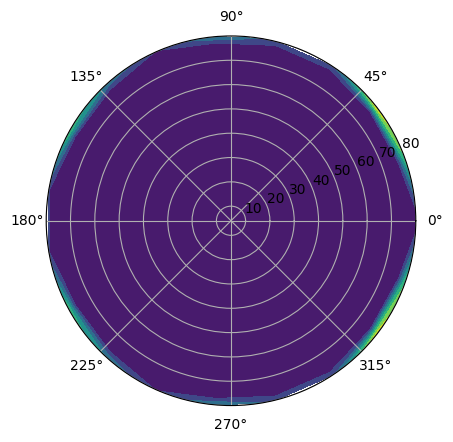

In [32]:
#----------------------------------------------------------------------------------------------------
# This is the graph for q1
#=====================================================================================================
#-- Generate Data -----------------------------------------
# Using linspace so that the endpoint of 360 is included...
azimuths = tha
zeniths = r

R, theta = meshgrid(zeniths, azimuths)
values = q1.real


#-- Plot... ------------------------------------------------
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
ax.contourf(theta, R, transpose(values))

plt.show()